# SVM

In [63]:
# Edwin Peter
# 177019

# C = 100

In [64]:
import pandas as pd
import numpy as np
from random import random
from sklearn.svm import SVC
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [65]:
df = pd.read_csv("andSVM_2.csv")
print df
x = np.asarray(df)[:,0:2]
y = np.asarray(df)[:,-1]

   X1  X2  y
0   0   0  0
1   0   1  0
2   1   0  0
3   1   1  1
4   2   3  1
5   3   2  1
6   0  -1  0


In [66]:
C = 100
classifier = SVC(kernel = 'linear', random_state = 0, C=C )
classifier.fit(x, y)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [67]:
sv = classifier.support_vectors_

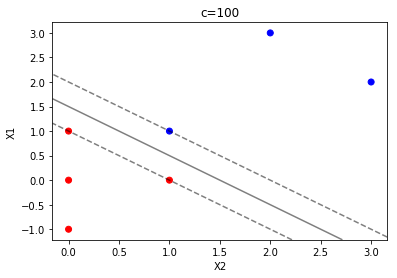

In [68]:
plt.scatter(x[:,0], x[:,1], c=['red' if i== 0 else 'blue' for i in y])
plt.xlabel('X2')
plt.ylabel('X1')

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = classifier.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(classifier.support_vectors_[:, 0], classifier.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none')
plt.title("c=100")
plt.show()

# C = 1

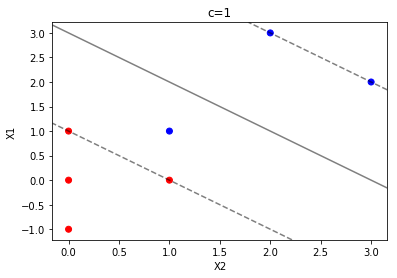

In [69]:
C = 1
classifier = SVC(kernel = 'linear', random_state = 0, C=C )
classifier.fit(x, y)
sv = classifier.support_vectors_
plt.scatter(x[:,0], x[:,1], c=['red' if i== 0 else 'blue' for i in y])
plt.xlabel('X2')
plt.ylabel('X1')

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = classifier.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(classifier.support_vectors_[:, 0], classifier.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none')
plt.title("c=1")
plt.show()

# C = 50

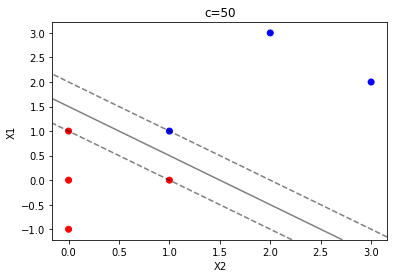

In [70]:
C = 50
classifier = SVC(kernel = 'linear', random_state = 0, C=C )
classifier.fit(x, y)
sv = classifier.support_vectors_
plt.scatter(x[:,0], x[:,1], c=['red' if i== 0 else 'blue' for i in y])
plt.xlabel('X2')
plt.ylabel('X1')

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = classifier.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(classifier.support_vectors_[:, 0], classifier.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none')
plt.title("c=50")
plt.show()

# Circle Data Neural Network

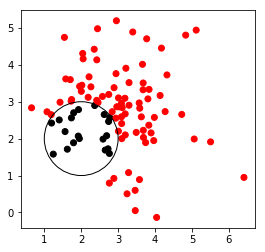

In [74]:
import matplotlib.patches as patches
import matplotlib.path as path
import math
import tensorflow as tf

num_points = 100
radius = 1
centre = (2,2)
X = np.random.normal(3, 1, [num_points,2])
Y = np.zeros(shape=(len(X),1))

for i,index in zip(X, range(len(X))):
    xcor,ycor = i[0], i[1]
    dist = math.sqrt((centre[0] - xcor) ** 2 + (centre[1] - ycor) ** 2)
    if (dist <= radius):
        Y[index] = 1
        
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, aspect='equal')
ax1.add_patch(patches.Circle(centre, radius, fill= False))
plt.scatter(X[:,0],X[:,1],color=['black' if i==1 else 'red' for i in Y])

In [83]:
input_size=2
hidden_layers=5
output_size=1
x = tf.placeholder(tf.float32,shape=[None,input_size])
y_ = tf.placeholder(tf.float32,shape=[None,output_size])

W1 = tf.Variable(tf.random_uniform([input_size,hidden_layers], -1, 1))
b1 = tf.Variable(tf.zeros([hidden_layers]))

W2 = tf.Variable(tf.random_uniform([hidden_layers,output_size], -1, 1))
b2 = tf.Variable(tf.zeros([output_size]))

hidden_layer = tf.nn.sigmoid(tf.add(tf.matmul(x, W1), b1))

y = tf.nn.sigmoid(tf.add(tf.matmul(hidden_layer, W2),b2))

lossfn = tf.reduce_mean(tf.reduce_sum((y_-y)**2))

learning_rate = 0.1
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(lossfn)

init = tf.global_variables_initializer()
sess = tf.Session()
correct_prediction = tf.equal(tf.round(y),y_) 
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

sess.run(init)

epochs = 15000

for i in range(epochs):
    sess.run(train_step, feed_dict={x: X, y_: Y})

acc = sess.run(accuracy, feed_dict={x: X, y_: Y})*100
print "Neural Network Accuracy: {}%".format(acc)

Neural Network Accuracy: 100.0%


# Circle Data SVM

In [76]:
classifier = SVC(kernel = 'rbf', random_state = 0, C=1)
classifier.fit(X, Y)
sv = classifier.support_vectors_

prediction = classifier.predict(X)

acc = np.mean(prediction==Y.T)*100
print "Accuracy: {}%".format(acc)

Accuracy: 95.0%


[[80  0]
 [ 5 15]]


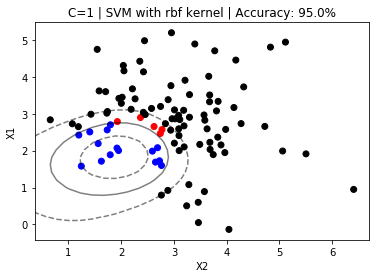

In [77]:
confusion_matrix = metrics.confusion_matrix(Y, prediction)
print confusion_matrix

matrix = Y.flatten("K") + prediction
# Matrix: 2 = Correctly predicted inside circle, 1 = wrongly predicted, 0 = Correctly predicted outside circle

plt.scatter(X[:,0], X[:,1], c = ['black' if i == 0 else 'red' if i == 1 else 'blue' for i in matrix])
plt.xlabel('X2')
plt.ylabel('X1')

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = classifier.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(classifier.support_vectors_[:, 0], classifier.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none')

title = 'C=1 | SVM with rbf kernel | Accuracy: ' + str(acc) + '%'
plt.title(title)
plt.show()